# This notebook shows how to set up the invoice pipeline API calls

In [ ]:
import os
import json


def get_filename(directory, filename):
    cwd = os.getcwd()
    local_directory = os.path.join(os.path.split(cwd)[0], directory)
    ci_directory = os.path.join(cwd, directory)

    if os.path.exists(local_directory) and filename in os.listdir(local_directory):
        return os.path.join(local_directory, filename)
    elif os.path.exists(ci_directory) and filename in os.listdir(ci_directory):
        return os.path.join(ci_directory, filename)
    else:
        raise FileNotFoundError


## Load and display an example invoice

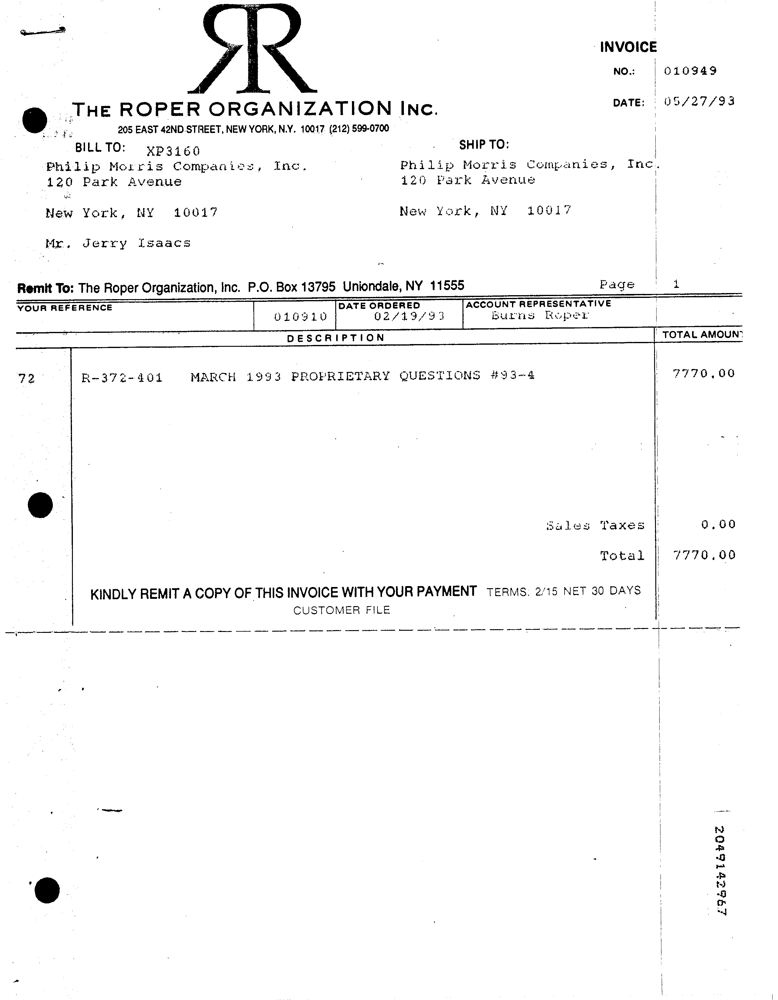

In [ ]:
from PIL import Image

sample_image = get_filename("sample-docs", "4fabfaab-1299.png")

Image.open(sample_image)


## API call to the inference function that processes an invoice. Two models are available, Donut and LayoutLMv1.

In [ ]:
# pipeline-api
from prepline_invoices.invoice import (
    DocumentInvoice,
    InvoiceModel,
)


def partition_invoice(
    file,
    filename,
    file_content_type=None,
):
    return {
        "invoice": str(
            DocumentInvoice.from_file(file, filename, InvoiceModel())
        )
    }



/Users/ajimeno/.pyenv/versions/3.8.14/envs/unstructured/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [ ]:
filename = get_filename("sample-docs", "4fabfaab-1299.png")


In [ ]:
# pipeline-api
def pipeline_api(
    file,
    file_content_type=None,
    filename=None,
):
    return partition_invoice(file, filename, file_content_type)


## Example result for the invoice model

In [ ]:
import warnings

with open(filename, "rb") as f, warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    print(pipeline_api(f, filename=filename)["invoice"])


{'VendorName': 'THE ROPER ORGANIZATION INC.', 'VendorAddress': '20 EAST 42ND STREET, NEW YORK, N.Y. 10017', 'InvoiceId': '010949', 'InvoiceDate': '05/27/93', 'CustomerName': 'Philip Morris Companies, Inc.', 'CustomerAddress': '120 Park Avenue New York, NY 10017', 'CustomerAddressRecipient': 'Mr. Jerry Isaacs', 'SubTotal': '7770.00', 'TotalTax': '0.00', 'AmountDue': '7770.00', 'ItemLines': {'Description': 'R-372-401 March 1993 PROFRIETARY QUESTIONS #93-4', 'Amount': '7770.00'}}
VendorName: THE ROPER ORGANIZATION INC.

VendorAddress: 20 EAST 42ND STREET, NEW YORK, N.Y. 10017

InvoiceId: 010949

InvoiceDate: 05/27/93

CustomerName: Philip Morris Companies, Inc.

CustomerAddress: 120 Park Avenue New York, NY 10017

CustomerAddressRecipient: Mr. Jerry Isaacs

SubTotal: 7770.00

TotalTax: 0.00

AmountDue: 7770.00

Description: R-372-401 March 1993 PROFRIETARY QUESTIONS #93-4 Amount: 7770.00
